<a href="https://colab.research.google.com/github/lsmanoel/BasicOfPython/blob/master/BasicOfTensorflow/Tensorflow_basicConcepts_volume1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Concepts of Tensorflow - Volume 1

By Lucas Seara Manoel

More in [tensorflow.org/tutorials/](https://www.tensorflow.org/tutorials/)

# Tensors :
[tensorflow.org/guide/tensors](https://www.tensorflow.org/guide/tensors)

TensorFlow, as the name indicates, is a framework to define and run computations involving tensors. A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes. Some types of tensors are special, and these will be covered in other units of the TensorFlow guide. The main ones are:

 *   tf.Variable
 *   tf.constant
 *  tf.placeholder
 *  tf.SparseTensor





In [0]:
import tensorflow as tf

constant = tf.constant([1, 2, 3])
tensor = constant * constant

with tf.Session() as sess:
  print(tensor)
  print(tensor.eval())


Tensor("mul_3887:0", shape=(3,), dtype=int32)
[1 4 9]


# Graphs and Sessions :
[tensorflow.org/guide/graphs](https://www.tensorflow.org/guide/graphs)

All computation with Tensorflow are represented by dataflow graph. First, the architecture is defined by the data flow graph and then this process is executed in a session.

![alt text](https://www.tensorflow.org/images/tensors_flowing.gif)

# Placeholders: 
In Tensorflow, this type  of declaration is like a variables that you dont need to provide an initial value. You can specify it at runtime, inside in the code section: **Session.run**, with an argument type called feed_dict. The Placeholders is simply a type of variable that we will assign data to at a later data. This feature allows us to create **our operations** and build our computation graph, without needing the data. Placeholders do not need to be statically sized. Let’s update our program to allow x to take on any length. Change the definition of x to be:



In [0]:
import tensorflow as tf

#-------------------------------------------------------------------------------
#Placeholder int32 type:
x = tf.placeholder("int32", None)

#-------------------------------------------------------------------------------
#our operations:
y = tf.pow(x, 2)

#-------------------------------------------------------------------------------
#code section: Session.run:
with tf.Session() as sess:
  result = sess.run(y, feed_dict={x: [1, 2, 3, 4]})
  print(result)

[ 1  4  9 16]


In [0]:
import tensorflow as tf

#-------------------------------------------------------------------------------
#Placeholder float32 type:
x = tf.placeholder("float32", None)

#-------------------------------------------------------------------------------
#Our operations:
y = tf.pow(x, 2)

#-------------------------------------------------------------------------------
#Code section: Session.run:
with tf.Session() as sess:
  result = sess.run(y, feed_dict={x: [1, 2, 3, 4]})
  print(result)

[ 1.  4.  9. 16.]


In [0]:
import tensorflow as tf

def factorial(x):
  return tf.exp(tf.lgamma(x+1))

#Approximation of the sine by power series
def sin(x, n):
  y = x
  sconst = -1.0
#   sconst = tf.constant(-1.0)
  s = sconst
  for i in range(3, int(n), 2):
      y = y + s*tf.divide(tf.pow(x, float(i)), factorial(float(i)))
      s = s*sconst
      tf.print(s)
      
  return y

x = tf.placeholder("float32", None)
y1 = sin(x, 12)
y2 = tf.sin(x)

with tf.Session() as sess:
    result = sess.run(y1, feed_dict={x: [0.0, 0.392699, 0.785398, 1.570796]})
    print(result)
    result = sess.run(y2, feed_dict={x: [0.0, 0.392699, 0.785398, 1.570796]})
    print(result)

[0.         0.38268334 0.70710665 0.9999999 ]
[0.         0.38268337 0.70710665 1.        ]


Placeholders can also have multiple dimensions, allowing for storing arrays. The first dimension of the placeholder is **None**, meaning we can have any number of rows. The second dimension is fixed at **3**, meaning each row needs to have three columns of data:

In [0]:
import tensorflow as tf

x = tf.placeholder("float", [None, 3])

y = 2*x

with tf.Session() as sess:
    x_data = [[1, 2, 3],
              [4, 5, 6]]
    result = sess.run(y, feed_dict={x: x_data})
    print(result)

[[ 2.  4.  6.]
 [ 8. 10. 12.]]


In [0]:
import tensorflow as tf

x = tf.placeholder("float", [None, 3])

y = x*x

with tf.Session() as sess:
    x_data = [[1, 2, 3],
              [4, 5, 6]]
    result = sess.run(y, feed_dict={x: x_data})
    print(result)

[[ 1.  4.  9.]
 [16. 25. 36.]]


In [0]:
import tensorflow as tf

x = tf.placeholder("float", [None, 3])

y = x[0, :] * x[1, :]

with tf.Session() as sess:
    x_data = [[1, 2, 3],
              [4, 5, 6]]
    result = sess.run(y, feed_dict={x: x_data})
    print(result)

[ 4. 10. 18.]


In [0]:
import tensorflow as tf

x = tf.placeholder("float", [None, 3])

y = x[:, 0] + x[:, 1] + x[:, 2]

with tf.Session() as sess:
    x_data = [[1, 2, 3],
              [4, 5, 6]]
    result = sess.run(y, feed_dict={x: x_data})
    print(result)

[ 6. 15.]


In [0]:
import tensorflow as tf

x = tf.placeholder("float", [None, 3])

y = tf.matmul(x, tf.transpose(x))

with tf.Session() as sess:
    x_data = [[1, 2, 3],
              [4, 5, 6]]
    result = sess.run(y, feed_dict={x: x_data})
    print(result)

[[14. 32.]
 [32. 77.]]


In [0]:
import tensorflow as tf

x1 = tf.placeholder("float", [None, 3])
x2 = tf.placeholder("float", [3, 1])

y = tf.matmul(x1, x2)

with tf.Session() as sess:
    x1_data = [[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]]
    
    x2_data = [[1],
               [2],
               [3]]
    
    result = sess.run(y, feed_dict={x1: x1_data, x2: x2_data})
    print(result)

[[6.]
 [6.]
 [6.]
 [6.]]


In [0]:
import tensorflow as tf

x1 = tf.placeholder("float", [1, 3])
x2 = tf.placeholder("float", [3, None])

y = tf.matmul(x1, x2)

with tf.Session() as sess:
    x1_data = [[1, 2, 3]]
    
    x2_data = [[1, 1, 1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1, 1, 1]]
    
    result = sess.run(y, feed_dict={x1: x1_data, x2: x2_data})
    print(result)

[[6. 6. 6. 6. 6. 6. 6.]]


# Variable:
Variables are necessary elements because they hold values such as the weights of the neural network. Unlike Placeholders, initializers of the variables must be run before all other session operations in the model. When we define a variable, we basically pass a tensor and its value to the graph.

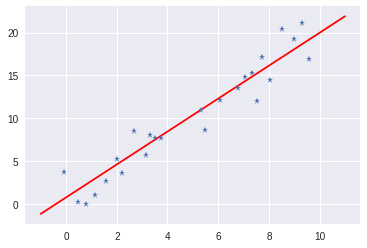

In [0]:
import tensorflow as tf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

plotSize = 25
x_data = np.linspace(0, 10, plotSize) + np.random.uniform(-1.5, 1.5, plotSize)
y_label = np.linspace(0, 20, plotSize) + np.random.uniform(-1.5, 1.5, plotSize)

m = tf.Variable(2.0)
b = tf.Variable(2.0)

error = 0
for x,y in zip(x_data,y_label):    
    y_hat = m*x + b  #Our predicted value  
    
    # The cost we want to minimize 
    # (we'll need to use an optimization function for the minimization!)
    error += (y-y_hat)**2 

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)    

init = tf.global_variables_initializer()

with tf.Session() as sess:    
    sess.run(init)   
    epochs = 100   
    for i in range(epochs):       
        sess.run(train)        

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])
    
x_test = np.linspace(-1, 11, plotSize)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

0.47341692 4.9510074


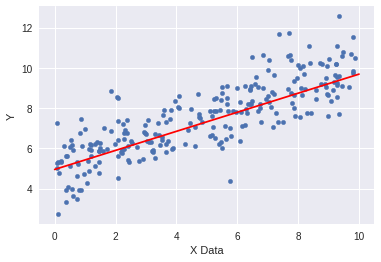

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))

# y = mx + b + noise_levels
b_true = 5.0
y_true = 0.5*x_data + b_true + noise

my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),
                     pd.DataFrame(data=y_true,columns=['Y'])],
                    axis=1)

# Random 10 points to grab
batch_size = 8
m = tf.Variable(1.0)
b = tf.Variable(1.0)

xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

y_model = m*xph + b

error = tf.reduce_sum(tf.square(yph - y_model))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

init = tf.global_variables_initializer()

with tf.Session() as sess:    
    sess.run(init)    
    batches = 1000   
    for i in range(batches): 
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict=feed)        
    model_m, model_b = sess.run([m, b])
    print(model_m, model_b)
    
y_hat = model_m*x_data + model_b

my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')


# Save and restore variables

[tensorflow.org/guide/saved_model](https://www.tensorflow.org/guide/saved_model)

Tensorflow Variables are the best way to represent shared, persistent state manipulated by our program. So it is interesting to be able to save the variables manipulated (trained) by our program. The **tf.train.Saver** constructor adds save and restore ops to the graph for all, or a specified list, of the variables in the graph.


**Save variables:**

In [0]:
# Create some variables.
v1 = tf.get_variable("v1", shape=[3], initializer = tf.zeros_initializer)
v2 = tf.get_variable("v2", shape=[5], initializer = tf.zeros_initializer)

inc_v1 = v1.assign(v1+1)
dec_v2 = v2.assign(v2-1)

# Add an op to initialize the variables.
init_op = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, initialize the variables, do some work, and save the
# variables to disk.
with tf.Session() as sess:
  sess.run(init_op)
  # Do some work with the model.
  inc_v1.op.run()
  dec_v2.op.run()
  # Save the variables to disk.
  save_path = saver.save(sess, "/tmp/model.ckpt")
  print("Model saved in path: %s" % save_path)


**Restore variables:**

In [0]:
tf.reset_default_graph()

# Create some variables.
v1 = tf.get_variable("v1", shape=[3])
v2 = tf.get_variable("v2", shape=[5])

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "/tmp/model.ckpt")
  print("Model restored.")
  # Check the values of the variables
  print("v1 : %s" % v1.eval())
  print("v2 : %s" % v2.eval())


# Integrate a system of ordinary differential equations:
[tf.contrib.integrate.odeint ](https://www.tensorflow.org/api_docs/python/tf/contrib/integrate/odeint)

---
$$\frac{dy}{dt}=k \therefore y(t) = kt$$ 
$$k =2 \therefore y(t) = 2t$$ 

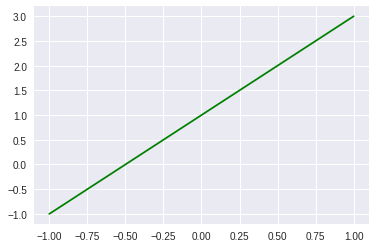

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(-1.0, 1.0, 100, dtype = np.float32)
t_tensor = tf.constant(value = t, dtype = tf.float32)
 
k = 2.0
func = lambda y, t_tensor: k

y_solved = tf.contrib.integrate.odeint(func, -1.0, t_tensor)

with tf.Session() as sess:
  y_solved = sess.run(y_solved)

plt.plot(t, y_solved, 'g')

---
$$\frac{dy}{dt}=kt \therefore y(t) = \frac{kt^{2}}{2}$$ 
$$k =2 \therefore y(t) = t^{2}$$ 

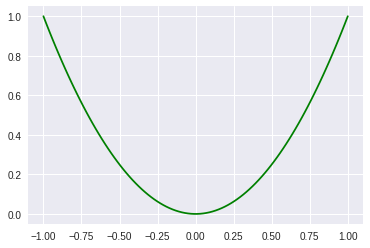

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(-1.0, 1.0, 100, dtype = np.float32)
t_tensor = tf.constant(value = t, dtype = tf.float32)
 
k = 2.0
func = lambda y, t_tensor: k*t_tensor

y_solved = tf.contrib.integrate.odeint(func, 1.0, t_tensor)

with tf.Session() as sess:
  y_solved = sess.run(y_solved)

plt.plot(t, y_solved, 'g')

---
$$\frac{dy}{dt}=ky \therefore y(t) = e^{kt}$$ 
$$k =-0.25 \therefore y(t) = e^{-0.25t}$$  

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


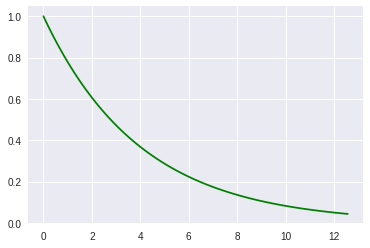

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0.0, 4*3.141593, 100)
t_tensor = tf.constant(value = t, dtype = tf.float32)

# Test a complex, linear ODE:
#   dy / dt = k * y,  y(0) = 1.0.
# Its analytical solution is y = exp(k * t).
k = -0.25 
func = lambda y, t: k * y

y_solved = tf.contrib.integrate.odeint(func, 1.0 + 0.0j, t)

with tf.Session() as sess:
  y_solved = sess.run(y_solved)

plt.plot(t, y_solved, 'g')

---
$$\frac{dy}{dt}=ky \therefore y(t) = e^{kt}$$ 
$$k =j2 \therefore y(t) = e^{j2}$$  

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


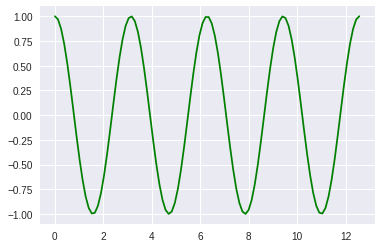

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0.0, 4*3.141593, 100)
t_tensor = tf.constant(value = t, dtype = tf.float32)

# Test a complex, linear ODE:
#   dy / dt = k * y,  y(0) = 1.0.
# Its analytical solution is y = exp(k * t).
k = 2j
func = lambda y, t: k * y

y_solved = tf.contrib.integrate.odeint(func, 1.0 + 0.0j, t)

with tf.Session() as sess:
  y_solved = sess.run(y_solved)

plt.plot(t, y_solved, 'g')

---
$$\frac{dy}{dt}=ky \therefore y(t) = e^{kt}$$ 
$$k =-0.25+j2 \therefore y(t) = y(t) = e^{(-0.25+j2)t} = e^{-0.25t}e^{j2t}$$ 

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


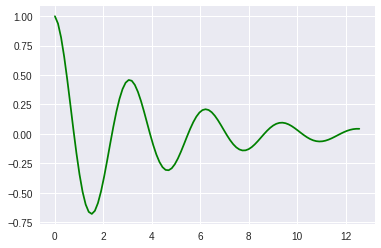

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0.0, 4*3.141593, 100)
t_tensor = tf.constant(value = t, dtype = tf.float32)

# Test a complex, linear ODE:
#   dy / dt = k * y,  y(0) = 1.0.
# Its analytical solution is y = exp(k * t).
k = 2j-0.25 
func = lambda y, t: k * y

y_solved = tf.contrib.integrate.odeint(func, 1.0 + 0.0j, t)

with tf.Session() as sess:
  y_solved = sess.run(y_solved)

plt.plot(t, y_solved, 'g')

---
In 1963, Edward Lorenz developed a simplified mathematical model for atmospheric convection. The model is a system of three ordinary differential equations now known as the Lorenz equations: 

$$\frac{dx}{dt}=\sigma(y-x)$$ 
$$\frac{dy}{dt}=x(\rho-z)-y $$
$$\frac{dz}{dt}=xy-\beta z$$ 

In particular, the Lorenz attractor is a set of chaotic solutions of the Lorenz system which, when plotted, resemble a butterfly or figure eight. 


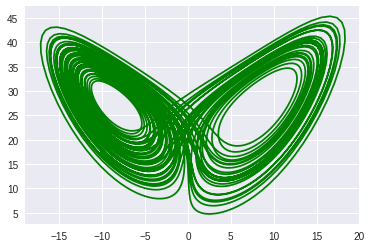

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

rho = 28.0
sigma = 10.0
beta = 8.0/3.0

def lorenz_equation(state, t):
  x, y, z = tf.unstack(state)
  dx = sigma * (y - x)
  dy = x * (rho - z) - y
  dz = x * y - beta * z
  return tf.stack([dx, dy, dz])

init_state = tf.constant([0, 2, 20], dtype=tf.float64)
t = np.linspace(0, 50, num=5000)

tensor_state, tensor_info = tf.contrib.integrate.odeint(
    lorenz_equation, init_state, t, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
x, y, z = state.T
plt.plot(x, z, 'g')


---